# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

### Problem statement:
This is an analysis of traffic accidents and license issued in the Kingdom of Saudi Arabia.
This conducted study will attempt to analyze and find any correlations and effect of the two data sets provided. Also find out information about the regions, licenses and accidents in the data frames:
Data frames:

**Traffic accidents:** This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.

**Driving livenses:** This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics .

This study attempts to:
- Clean the data, and match them for a proper analysis.
- Find links between the two datasets.
- Find causation of the accidents and locate abnormality.
- Find real applicable causes that  describe the findings.


**Importing:** necissary libraries.

In [238]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [103]:
#Importing both csv files, and seperating them where there is ';'. Because it is a csv file:

licenses  = pd.read_csv("../data/saudi-arabia-driving-licenses-2004-2008.csv",sep=';')
accidents = pd.read_csv("../data/saudi-arabia-traffic-accidents-2008.csv",sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook, to understand the data.

In [104]:
#display the first 10 rows of accidents:
accidents.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [105]:
#display the first 10 rows of licenses:
licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

**Accidents:** Contain the data of accidents in the kingdom of saudi arabia, and display the year of the accidents, the region it occured, the outcome of the accident (death/injury), the value, and the geographical location of the accidents.

**Licenses:** Contain the data of licenses, such as the year and the region of the licenses and the quantity issued and the geographic location.

#### 4a. How complete is the data?
Using .info() to generate information on the 2 data sets:


In [106]:
print(accidents.info())
print("\n")                      #using print('\n'), to print both infos() in one line.
print(licenses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB
None


## Data sets contents:

**Accidents:** 
- Has (84 rows) & (7 columns) of which 2 are unnamed repitition of the indexe.
- The column "geo_points_2d has 6 null values.
- All the values are strings other than the indexes(including repeated).

**Licenses:** 
- Has (350 rows) & (5 columns) of which 1 are unnamed repitition of the indexe.
- The column "geo_points_2d has 25 null values.
- All the values are strings other than the index.

In [107]:
#Fixing the repeated index/column problem:
accidents.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1, inplace=True)

licenses.drop("Unnamed: 0",axis=1, inplace=True)

In [108]:
#licenses.columns
accidents.columns

Index(['Year', 'Region', 'Indicator', 'Value', 'geo_point_2d'], dtype='object')

#### 4b. Are there any obvious issues with the observations?

**The minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [109]:
# Accidents max and min values:
print(accidents.max())
print("\n")
print(accidents.min())

Year                              (2017)
Region                             Total
Indicator    No. of Casualties - Injured
Value                             99925n
dtype: object


Year                   (2016)
Region               Al-Baaha
Indicator    No. of Accidents
Value                   1007n
dtype: object


In [110]:
# Licenses max and min values:
print(licenses.max())
print("\n")
print(licenses.min())

Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object


Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [111]:
#code
print(accidents.dtypes)
print("\n")
print(licenses.dtypes)

Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object


Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

### Answer: 

- **Accidents** 
 - Years should be an intiger.
 - Value should be in intiger.
 - All else are strings as they should be.


- **Licinses** 
 - Years should be an intiger.
 - Driving license number should be in intiger.
 - All else are strings as they should be.


#### 6. Fix incorrect data types
Based on what is discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [112]:
# Way 1 
#defining a function:
# accidents= accidents.copy()
# def convert(t):
#     try:
#         return int(t)
#     except:
#         return t
# accidents.Year.map(convert)

In [113]:
# Removing string characers the Year/Value columns in accidents...
# and changing the data types from string to int:
accidents["Year"] = accidents["Year"].apply(lambda x: x.strip("()")).astype(int)#removing the "()"
accidents["Value"] = accidents["Value"].apply(lambda x: x.strip("n")).astype(int)#removing the "n"

In [114]:
#check data types:
accidents.dtypes

Year             int32
Region          object
Indicator       object
Value            int32
geo_point_2d    object
dtype: object

In [115]:
# Removing string characers the Year/Driving Liceses columns in licenses...
# and changing the data types from string to int:
licenses["Year"] = licenses["Year"].apply(lambda x: x.strip("()")).astype(int)
licenses["Driving Liceses"]  = licenses["Driving Liceses"].apply(lambda x: x.strip("n")).astype(int)

In [116]:
#check data types:
licenses.dtypes

Year                    int32
Administritive Area    object
Driving Liceses         int32
geo_point_2d           object
dtype: object

- Make new columns `x` and `y` using `geo_point_2d`

In [117]:
#for accidents:
#Splitting the "geo_point_2d" into 2 different columns x & y, then deleting the original:
accidents['x'], accidents['y'] = accidents['geo_point_2d'].str.split(',', 1).str
accidents.drop("geo_point_2d", axis=1, inplace = True)
accidents.head()

#changing types of x and y to int:
accidents[["x","y"]] = accidents[["x","y"]].astype(float)

In [118]:
#for licences
#Splitting the "geo_point_2d" into 2 different columns x & y, then deleting the original:
licenses['x'], licenses['y'] = licenses['geo_point_2d'].str.split(',', 1).str
licenses.drop("geo_point_2d", axis=1, inplace = True)
licenses.head()

#changing types of x and y to int:
licenses[["x","y"]] = licenses[["x","y"]].astype(float)

- Fix any individual values preventing other columns from being the appropriate type.

In [119]:
#Compairing both data sets region columns:
#accidents.region.unique()
licenses["Administritive Area"].unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

In [120]:
#Matching the names of the regions to have the same spelling:

#accidents["region"] = accidents["region"=="Qassim"].apply(lambda x: x.rename("Al-Qaseem"))

accidents["Region"] = accidents["Region"].str.replace("Qassim","Al-Qaseem")     
accidents["Region"] = accidents["Region"].str.replace("Eastern Region","Eastern")       
accidents["Region"] = accidents["Region"].str.replace("Asir","Assir")             
accidents["Region"] = accidents["Region"].str.replace("Al-Baaha","Al-Baha")  

In [121]:
#checking the adjustment done to region content:
accidents.head(10)
licenses.head(10) 

,Year,Administritive Area,Driving Liceses,x,y
0,2012,Makkah,143954,21.628963,41.263690
1,1994,Makkah,75349,21.628963,41.263690
2,1998,Makkah,86082,21.628963,41.263690
3,2004,Makkah,86636,21.628963,41.263690
4,2005,Makkah,65099,21.628963,41.263690
5,2008,Makkah,77013,21.628963,41.263690
6,2014,Madinah,31447,24.927535,39.491824
7,2013,Madinah,28513,24.927535,39.491824
8,2012,Madinah,14459,24.927535,39.491824
9,1994,Madinah,3767,24.927535,39.491824


- Finish your data modifications by making sure the columns are now typed appropriately.

In [122]:
#code:
#done above.

- Display the data types again to confirm they are correct.

In [123]:
#Code:
print(accidents.dtypes)
print("\n")
print(licenses.dtypes)

Year           int32
Region        object
Indicator     object
Value          int32
x            float64
y            float64
dtype: object


Year                     int32
Administritive Area     object
Driving Liceses          int32
x                      float64
y                      float64
dtype: object


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [124]:
#changing the column names of the accidents data set:
accidents.rename(columns={"Year":"year" , "Region":"region" , "Indicator":"result" ,"Value":"no_accidents"}, inplace=True)
accidents.columns

Index(['year', 'region', 'result', 'no_accidents', 'x', 'y'], dtype='object')

In [125]:
#changing the column names of the license data set:
licenses.rename(columns={"Year":"year" , "Administritive Area":"region" , "Driving Liceses":"license_no"}, inplace=True)
licenses.columns

Index(['year', 'region', 'license_no', 'x', 'y'], dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

# Data dictionary:
## Accidents:
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**Year**|*integer*|accidents|The year the data was collected about the accidents.| 
|**Region**|*String*|accidents|The Location region of saudi arabia the accidents ocurred.
|**Indicator**|*String*|accidents|The repercussions of the accidents, injury, death etc.
|**Value**|*integer*|accidents|the number of accidents that happned.
|**x**|*integer*|accidents|the longitude of the location the accident occured.
|**y**|*integer*|accidents|The latitude of the location the accident occured.

## Licenses:
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**Year**|*integer*|licenses|The year the data was collected about the licenses.| 
|**Administritive Area**|*String*|licenses|The Location region of saudi arabia the licenses were issued.
|**Driving Licenses**|*integer*|licenses|the number of licenses that were issued that year.
|**x**|*integer*|licenses|the longitude of the location the license.
|**y**|*integer*|licenses|The latitude location of the license.

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [126]:
#checking the accident head for ease of identification.
accidents.head()

,year,region,result,no_accidents,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


## for accidents

In [127]:
t = accidents[accidents['region'] != 'Total'].groupby(by=['year', "result"]).sum()
t

no_accidents           x           y
year result                                                           
2016 No. of Accidents                   533380  309.535811  553.836254
     No. of Casualties - Dead             9031  309.535811  553.836254
     No. of Casualties - Injured         38120  309.535811  553.836254
2017 No. of Accidents                   460488  309.535811  553.836254
     No. of Casualties - Dead             7489  309.535811  553.836254
     No. of Casualties - Injured         33199  309.535811  553.836254

In [128]:
accidents[accidents['region'] == 'Total']

,year,region,result,no_accidents,x,y
8,2017,Total,No. of Casualties - Dead,7489,NaN,NaN
29,2016,Total,No. of Accidents,533380,NaN,NaN
30,2016,Total,No. of Casualties - Injured,38120,NaN,NaN
68,2017,Total,No. of Accidents,460488,NaN,NaN
69,2017,Total,No. of Casualties - Injured,33199,NaN,NaN
77,2016,Total,No. of Casualties - Dead,9031,NaN,NaN


**Since the total is equal to the no. of accidents, the total must be deleted. for 2 reasons. It is not a region, and its redundant.**

## for licenses:

In [129]:
t = licenses[licenses['region'] != 'Total'].groupby(by=['year']).sum()
t.tail(2)

,license_no,x,y
year,,,
2016,697017,309.535811,553.836254
2017,928165,309.535811,553.836254


In [130]:
licenses[licenses['region'] == 'Total'].sort_values(by = "year").tail(2)

,year,region,license_no,x,y
314,2016,Total,697017,NaN,NaN
59,2017,Total,928165,NaN,NaN


**Same as accidents, total does not belong.**

## Removing the totals:
## For accidents:

In [131]:
#Removing total from region:
accidents = accidents[accidents.region != "Total"]

In [132]:
#Compairing no of rows and regions again:
accidents.info() # yes they are equal.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 83
Data columns (total 6 columns):
year            78 non-null int32
region          78 non-null object
result          78 non-null object
no_accidents    78 non-null int32
x               78 non-null float64
y               78 non-null float64
dtypes: float64(2), int32(2), object(2)
memory usage: 3.7+ KB


## For licences:

In [133]:
#Compairing no of rows and regions:
licenses.info() # no they are not equal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
year          350 non-null int32
region        350 non-null object
license_no    350 non-null int32
x             325 non-null float64
y             325 non-null float64
dtypes: float64(2), int32(2), object(1)
memory usage: 11.0+ KB


In [134]:
#Removing total from region:
licenses = licenses[licenses.region != "Total"]

In [135]:
#Compairing no of rows and regions again:
licenses.info() # yes they are equal.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 349
Data columns (total 5 columns):
year          325 non-null int32
region        325 non-null object
license_no    325 non-null int32
x             325 non-null float64
y             325 non-null float64
dtypes: float64(2), int32(2), object(1)
memory usage: 12.7+ KB


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [136]:
#Checking licenses:   (switch between the two to investigate)
accidents.head()
#licenses.head()

,year,region,result,no_accidents,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


## Long or Wide:
Accidents is long as there are many repeated rows, however licenses is wide because there are no repititions.

#### 10b. Changing formats
accidents must be changed to wide, for merging, with licenses.

In [137]:
#checking long or wide:
accidents.head()
# licenses.head()

,year,region,result,no_accidents,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


In [138]:
#code
accidents = accidents.pivot_table(index = ["year","region"], columns="result", values="no_accidents")
accidents

result                 No. of Accidents  No. of Casualties - Dead  \
year region                                                         
2016 Al-Baha                       3618                       185   
     Al-Jouf                      10212                       245   
     Al-Qaseem                    25664                       397   
     Assir                        32684                       983   
     Eastern                     101619                      1113   
     Hail                         10199                       299   
     Jazan                        25873                       514   
     Madinah                      14475                       822   
     Makkah                      134838                      2243   
     Najran                        3235                       173   
     Northern Boarder             13196                       193   
     Riyadh                      141736                      1430   
     Tabouk                       16031                       434   
2017 Al-Baha                       1414                       134   
     Al-Jouf                      10469                       240   
     Al-Qaseem                    22405                       319   
     Assir                        25245                       828   
     Eastern                      81433                       963   
     Hail                          9379                       265   
     Jazan                        22161                       466   
     Madinah                      16070                       580   
     Makkah                      145541                      1641   
     Najran                        3193                       194   
     Northern Boarder             11540                       112   
     Riyadh                       99925                      1399   
     Tabouk                       11713                       348   

result                 No. of Casualties - Injured  
year region                                         
2016 Al-Baha                                  1227  
     Al-Jouf                                   920  
     Al-Qaseem                                1513  
     Assir                                    2541  
     Eastern                                  4893  
     Hail                                      932  
     Jazan                                    2259  
     Madinah                                  4184  
     Makkah                                  12383  
     Najran                                    706  
     Northern Boarder                          631  
     Riyadh                                   4207  
     Tabouk                                   1724  
2017 Al-Baha                                  1007  
     Al-Jouf                                   862  
     Al-Qaseem                                1446  
     Assir                                    2368  
     Eastern                                  4073  
     Hail                                      773  
     Jazan                                    2207  
     Madinah                                  2917  
     Makkah                                  10623  
     Najran                                    766  
     Northern Boarder                          374  
     Riyadh                                   4540  
     Tabouk                                   1243

In [139]:
#changing the new pivot table column names:
accidents.rename(columns={"No. of Accidents":"accidents_no" , "No. of Casualties - Dead":"dead" , "No. of Casualties - Injured":"injured" }, inplace=True)
accidents.columns

Index(['accidents_no', 'dead', 'injured'], dtype='object', name='result')

In [140]:
accidents.dtypes

result
accidents_no    int32
dead            int32
injured         int32
dtype: object

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [141]:
#code
combined = pd.merge(accidents, licenses, on = ['region', 'year'], how='inner', suffixes=['_acc', '_lice'])
combined.head()

,region,year,accidents_no,dead,injured,license_no,x,y
0,Al-Baha,2016,3618,185,1227,4614,20.148406,41.466548
1,Al-Jouf,2016,10212,245,920,9371,29.967745,39.557037
2,Al-Qaseem,2016,25664,397,1513,9180,26.196706,43.343000
3,Assir,2016,32684,983,2541,41367,19.138785,42.941470
4,Eastern,2016,101619,1113,4893,142307,23.288331,50.147830


In [142]:
#changing the names of the new combined table:
combined.rename(columns={"Accidents_no":"accidents_no" , "No. of Casualties - Dead":"dead" , "No. of Casualties - Injured":"injured"}, inplace=True)

In [143]:
#checking names again:
combined.head(2)

,region,year,accidents_no,dead,injured,license_no,x,y
0,Al-Baha,2016,3618,185,1227,4614,20.148406,41.466548
1,Al-Jouf,2016,10212,245,920,9371,29.967745,39.557037


#### 12. Save your cleaned, merged dataframe

Using a relative path the data was saved sd `combined_datasets.csv`, in the "saved" file in the project folder.

In [154]:
combined.to_csv("../saved/combined_datasets.csv")

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [155]:
#Code:
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
year,26.0,2016.500000,0.509902,2016.000000,2016.000000,2016.500000,2017.000000,2017.000000
accidents_no,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000
license_no,26.0,62507.000000,107293.917762,2153.000000,8363.250000,16085.000000,51222.000000,495307.000000
x,26.0,23.810447,4.274533,17.207231,20.148406,23.288331,27.400846,30.197075
y,26.0,42.602789,3.313532,37.259858,41.263690,41.817119,43.343000,50.147830


## Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

### A function for both population and a sample std was created.

In [146]:
#std for population:
def std_dev_p(series):
    try:
        return np.sqrt(sum((series - series.mean())**2)/(len(series)))
    
    except:
        return None


  

In [147]:
print(std_dev_p(combined['accidents_no']))
print(std_dev_p(combined['dead']))
print(std_dev_p(combined['injured']))

45590.82869880505
539.1069593406002
2865.8854113220236


In [148]:
#std for sample
def std_dev_s(series):
    return np.sqrt(sum((series - series.mean())**2)/(len(series)-1))

In [149]:
print(std_dev_s(combined['accidents_no']))
print(std_dev_s(combined['dead']))
print(std_dev_s(combined['injured']))

46493.70503521458
549.7833811182785
2922.6411272103765


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [150]:
combined.dtypes

region           object
year              int64
accidents_no      int32
dead              int32
injured           int32
license_no        int32
x               float64
y               float64
dtype: object

In [151]:
#using a forloop comprehension, to take the std of each column...
#and put it in a dictionary as the value and the name of the column will be the key.
sd = {}

sd = dict((x, y) for x,y in combined.apply(std_dev_p).iteritems())
print(sd)

{'region': nan, 'year': 0.5, 'accidents_no': 45590.82869880505, 'dead': 539.1069593406002, 'injured': 2865.8854113220236, 'license_no': 105210.34237659337, 'x': 4.191524025811861, 'y': 3.2491853051316912}


### Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

numpy calculated the std of population, while pandas calculate the sample std.
above i made a function for both, normally the answer would be **No** , but as we calculated both it is different now.

In [156]:
#Code:
combined.describe()

,year,accidents_no,dead,injured,license_no,x,y
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2016.500000,38225.692308,635.384615,2743.038462,62507.000000,23.810447,42.602789
std,0.509902,46493.705035,549.783381,2922.641127,107293.917762,4.274533,3.313532
min,2016.000000,1414.000000,112.000000,374.000000,2153.000000,17.207231,37.259858
25%,2016.000000,10276.250000,241.250000,923.000000,8363.250000,20.148406,41.263690
50%,2016.500000,16050.500000,415.500000,1618.500000,16085.000000,23.288331,41.817119
75%,2017.000000,30981.250000,929.250000,3784.000000,51222.000000,27.400846,43.343000
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,50.147830


#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- A) Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- B) Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- C) What are the regions that have more Driving Licenses issued in each year than the year average?
- D) What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

# A)

In [157]:
licenses.head()

,year,region,license_no,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


In [158]:
# #regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
max_ta = licenses.groupby(['year','region'],sort=True)['license_no'].agg({'license_no':'sum'})
grouped_ta = max_ta['license_no'].groupby(level=0, group_keys=False)
grouped_ta.nlargest(1)

C:\Users\creed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


year  region 
1993  Riyadh     103886
1994  Riyadh     110545
1995  Riyadh     101608
1996  Riyadh     110131
1997  Riyadh      92145
1998  Riyadh     114962
1999  Makkah     103535
2000  Makkah      87053
2001  Makkah      85593
2002  Makkah      88593
2003  Eastern     82697
2004  Makkah      86636
2005  Eastern     82505
2006  Eastern     79517
2007  Eastern    106511
2008  Eastern    104626
2009  Makkah     112045
2010  Makkah     113531
2011  Eastern    151087
2012  Makkah     143954
2013  Riyadh     165994
2014  Riyadh     194208
2015  Makkah     157389
2016  Riyadh     242851
2017  Riyadh     495307
Name: license_no, dtype: int32

# B)

In [159]:
#regions that have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
max_ta = accidents.groupby(['year','region'],sort=True)['accidents_no'].agg({'accidents_no':'sum'})
grouped_ta = max_ta['accidents_no'].groupby(level=0, group_keys=False)
grouped_ta.nlargest(1)

C:\Users\creed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


year  region
2016  Riyadh    141736
2017  Makkah    145541
Name: accidents_no, dtype: int32

# C)

In [160]:
#What are the regions that have more Driving Licenses issued in each year than the year average:
years_mean = licenses.groupby('year')['license_no'].mean().reset_index()
lic_mean = []

for year in years_mean['year']:
    if len(combined[(combined['license_no'] > years_mean[years_mean['year'] == year].iloc[0]['license_no']) & \
             (combined['year'] == year)].index) > 0:
        lic_mean.append(pd.DataFrame(combined[(combined['license_no'] > years_mean[years_mean['year'] == year].iloc[0]['license_no']) & \
             (combined['year'] == year)]))

for df in lic_mean:
    print(df.iloc[:,:3])

     region  year  accidents_no
4   Eastern  2016        101619
5      Hail  2016         10199
8    Makkah  2016        134838
11   Riyadh  2016        141736
     region  year  accidents_no
17  Eastern  2017         81433
21   Makkah  2017        145541
24   Riyadh  2017         99925


# D)

In [161]:
#regions that have more Traffic Accidents happened in each year than the year average?
years_mean = accidents.groupby('year')['accidents_no'].mean().reset_index()
acc_mean = []

for year in years_mean['year']:
    if len(combined[(combined['accidents_no'] > years_mean[years_mean['year'] == year].iloc[0]["accidents_no"]) & \
             (combined['year'] == year)].index) > 0:
        lic_mean.append(pd.DataFrame(combined[(combined['accidents_no'] > years_mean[years_mean['year'] == year].iloc[0]['accidents_no']) & \
             (combined['year'] == year)]))

for df in lic_mean:
    print(df.iloc[:,:3])

     region  year  accidents_no
4   Eastern  2016        101619
5      Hail  2016         10199
8    Makkah  2016        134838
11   Riyadh  2016        141736
     region  year  accidents_no
17  Eastern  2017         81433
21   Makkah  2017        145541
24   Riyadh  2017         99925
     region  year  accidents_no
4   Eastern  2016        101619
8    Makkah  2016        134838
11   Riyadh  2016        141736
     region  year  accidents_no
17  Eastern  2017         81433
21   Makkah  2017        145541
24   Riyadh  2017         99925


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

plotting the new combined table n a heatmap plot, to show the relationship of all its attributes and columns.
the red area shows much correlation while the blue is less.

interpertation:
- License-no is correlated with accidents_no.
- Dead, injured ofcourse is correlated with the accident-no, but also with the license-no.
- The more licenses issued the more accidents.

Text(0.5, 1.0, 'Accidents:')

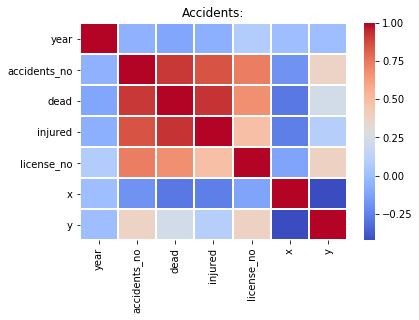

In [212]:
#getting the coefficient of the dataframe to bring the data together, that make it easier to read.
ac = combined.corr()
sns.heatmap(data= ac, cmap="coolwarm", linecolor= "white", linewidths= 1).set_title('Accidents:')

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=2,nrows=nrows, figsize=(15, 15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], density=True) # feel free to add more settings
        ax[i].set_xlabel(list_of_columns[i])
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        sns.distplot(dataframe[column], bins=20, kde=False, ax=ax[i], color = 'blue')
    plt.show()

In [ ]:
list_of_columns = ['accidents_no']
subplot_histograms(combined, list_of_columns, list_of_columns)
# combined.columns

#### Plot and interpret histograms 
For each of the following:
- A) Driving Licenses number
- B) Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

## Interpretation of both A and B: 
(Refer to plots bellow)

using the combined dataframe to get only 2017 and 2016:
- Riyadh has the most licenses issued the most licenses, followed by Makkah and the Eastern region.
- Even though the data is not identicle, the 3 regions are highest in both dataframes.
- Since the two data sets are infact correlated, we can assume that the most accidents happen within these regions.

# A)

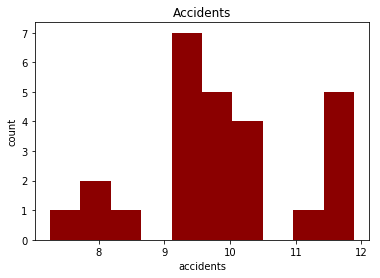

In [164]:
# Code
plt.hist(np.log1p(accidents["accidents_no"]),color="Darkred")
plt.title("Accidents")
plt.ylabel("count")
plt.xlabel("accidents")

plt.show()

C:\Users\creed\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\creed\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


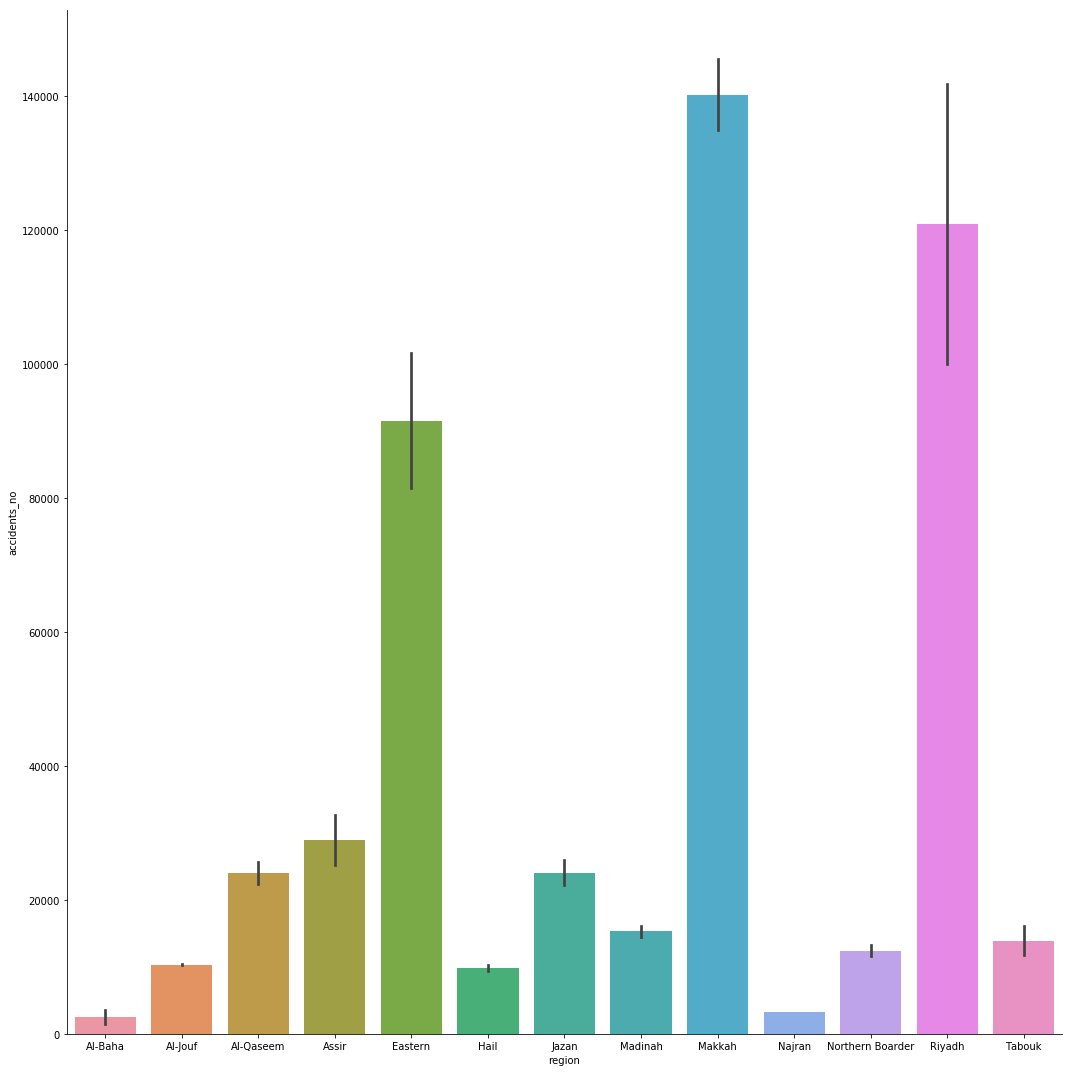

In [236]:
sns.factorplot(x="region",y="accidents_no",data=combined,kind="bar", size = 15)

In [230]:
combined.head()

,region,year,accidents_no,dead,injured,license_no,x,y
0,Al-Baha,2016,3618,185,1227,4614,20.148406,41.466548
1,Al-Jouf,2016,10212,245,920,9371,29.967745,39.557037
2,Al-Qaseem,2016,25664,397,1513,9180,26.196706,43.343000
3,Assir,2016,32684,983,2541,41367,19.138785,42.941470
4,Eastern,2016,101619,1113,4893,142307,23.288331,50.147830


# B)
the license histogram shows some points that match with the accidents histogram, and some that really does not.
but it is correlated.
an additional plot was created to show the license issuing by regions of saudi arabia.

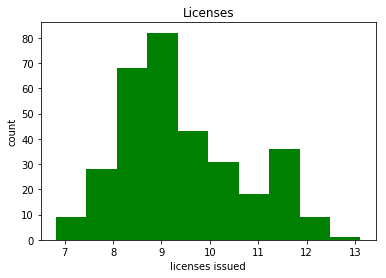

In [165]:
plt.hist(np.log1p(licenses["license_no"]),color="G")
plt.title("Licenses")
plt.ylabel("count")
plt.xlabel("licenses issued")


plt.show()

C:\Users\creed\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\creed\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


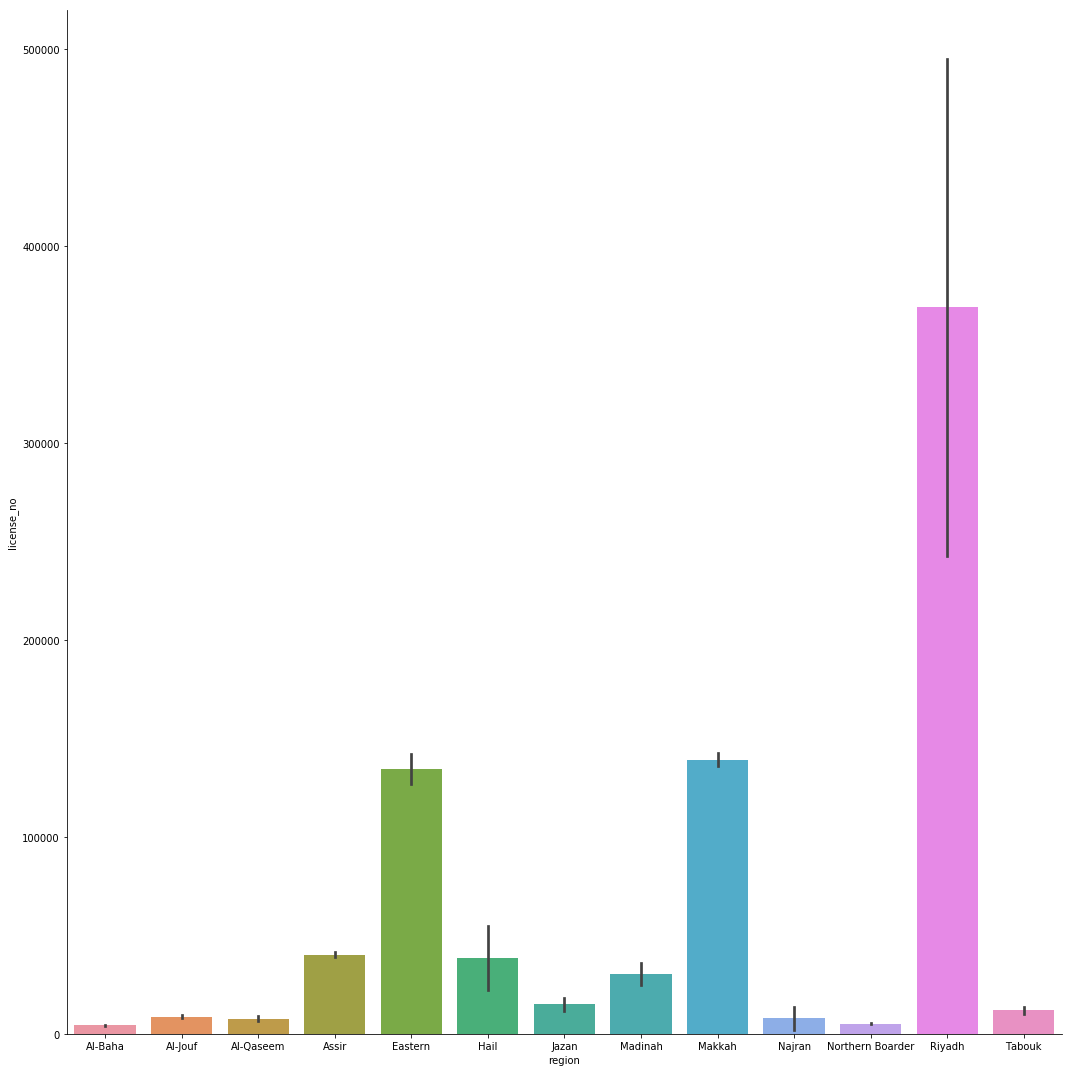

In [231]:
sns.factorplot(x="region",y="license_no",data=combined,kind="bar", size = 15)

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


# Interpretation of both A and B:

Both years show the in the begining of the year

# A)

In [242]:
from scipy.stats import pearsonr

C:\Users\creed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\creed\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


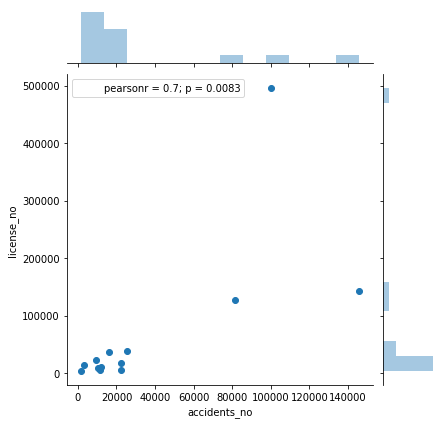

In [243]:
sns.jointplot('accidents_no', 'license_no', data=comb_2017, kind='scatter', stat_func=pearsonr)

From the plot it is clearly shows linear corrolation between number of accedents and licenes issued in 2017 with corolation of about 0.7

# B)

C:\Users\creed\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


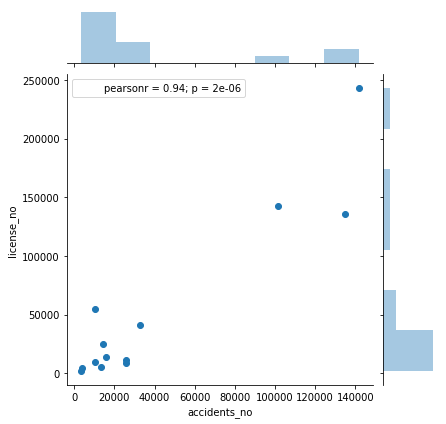

In [244]:
sns.jointplot('accidents_no', 'license_no', data=comb_2016, kind='scatter', stat_func=pearsonr)

From the plot it is clearly shows linear corrolation between number of accedents and licenes issued in 2017 with corolation of about 0.94

# C)

C:\Users\creed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\creed\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


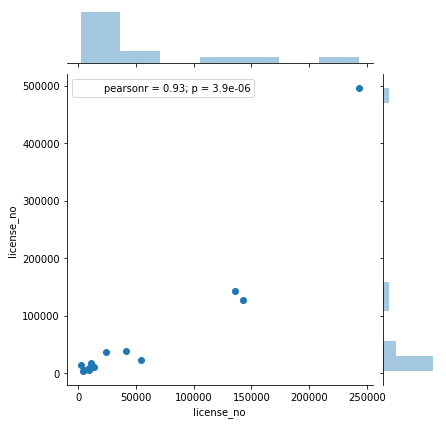

In [247]:
sns.jointplot(x=lic_2016, y=lic_2017, kind='scatter', stat_func=pearsonr)

From the plot it is clearly shows linear corrolation between number of issued licenes in 2017 and 2016 with corolation of about 0.93

# D)

C:\Users\creed\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


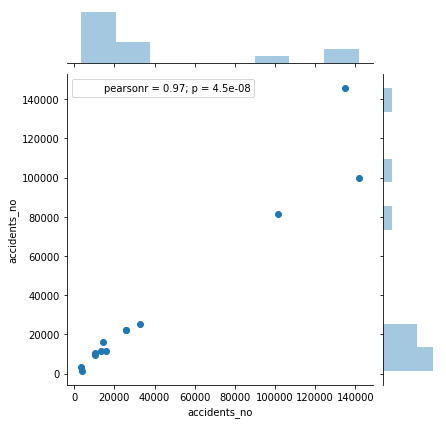

In [249]:
sns.jointplot(x=acc_2016, y=acc_2017, kind='scatter', stat_func=pearsonr)

From the plot it is clearly shows linear corrolation between number of accedents in 2017 and 2016 with corolation of about 0.97

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [261]:
combined.head()

,region,year,accidents_no,dead,injured,license_no,x,y
0,Al-Baha,2016,3618,185,1227,4614,20.148406,41.466548
1,Al-Jouf,2016,10212,245,920,9371,29.967745,39.557037
2,Al-Qaseem,2016,25664,397,1513,9180,26.196706,43.343000
3,Assir,2016,32684,983,2541,41367,19.138785,42.941470
4,Eastern,2016,101619,1113,4893,142307,23.288331,50.147830


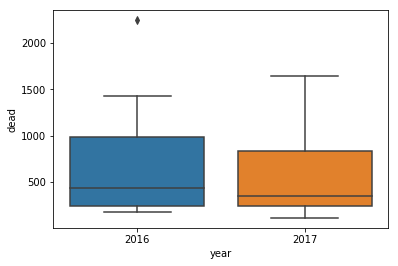

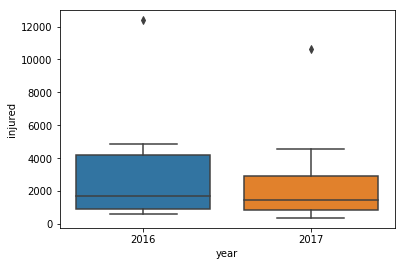

In [263]:
# Code
#g=sns.pairplot(accidents, kind=)
sns.boxplot(x="year", y="dead", data = combined)
plt.figure()
sns.boxplot(x="year", y="injured", data = combined)

There is a decline in the number of dead and injured individuals in 2017 compared to the previous year 

#### Additional plots below


This joint plot demonstarate the concentration of the accidents in saudi arabia using the longitude "x" , and the latitude "y", most accidents are in makkah, while eastern has more accidents, the region is bigger. Attempted bokhe library

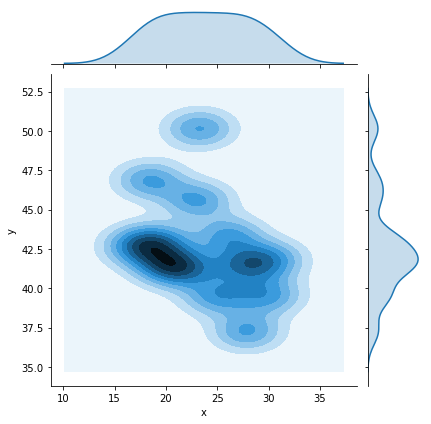

In [270]:
#making a jont plot to show the concentration of accidents with the license issuing 
sns.jointplot(x="x",y="y", data = combined,  kind = "kde")

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [300]:
#using .desc for each year seperatly:
combined.groupby('region').describe().T

region                  Al-Baha       Al-Jouf     Al-Qaseem         Assir  \
accidents_no count     2.000000      2.000000      2.000000      2.000000   
             mean   2516.000000  10340.500000  24034.500000  28964.500000   
             std    1558.463346    181.726443   2304.461000   5260.167345   
             min    1414.000000  10212.000000  22405.000000  25245.000000   
             25%    1965.000000  10276.250000  23219.750000  27104.750000   
             50%    2516.000000  10340.500000  24034.500000  28964.500000   
             75%    3067.000000  10404.750000  24849.250000  30824.250000   
             max    3618.000000  10469.000000  25664.000000  32684.000000   
dead         count     2.000000      2.000000      2.000000      2.000000   
             mean    159.500000    242.500000    358.000000    905.500000   
             std      36.062446      3.535534     55.154329    109.601551   
             min     134.000000    240.000000    319.000000    828.000000   
             25%     146.750000    241.250000    338.500000    866.750000   
             50%     159.500000    242.500000    358.000000    905.500000   
             75%     172.250000    243.750000    377.500000    944.250000   
             max     185.000000    245.000000    397.000000    983.000000   
injured      count     2.000000      2.000000      2.000000      2.000000   
             mean   1117.000000    891.000000   1479.500000   2454.500000   
             std     155.563492     41.012193     47.376154    122.329473   
             min    1007.000000    862.000000   1446.000000   2368.000000   
             25%    1062.000000    876.500000   1462.750000   2411.250000   
             50%    1117.000000    891.000000   1479.500000   2454.500000   
             75%    1172.000000    905.500000   1496.250000   2497.750000   
             max    1227.000000    920.000000   1513.000000   2541.000000   
license_no   count     2.000000      2.000000      2.000000      2.000000   
             mean   4372.500000   8731.000000   7749.000000  40250.000000   
             std     341.532575    905.096680   2023.739608   1579.676549   
             min    4131.000000   8091.000000   6318.000000  39133.000000   
             25%    4251.750000   8411.000000   7033.500000  39691.500000   
             50%    4372.500000   8731.000000   7749.000000  40250.000000   
             75%    4493.250000   9051.000000   8464.500000  40808.500000   
             max    4614.000000   9371.000000   9180.000000  41367.000000   
x            count     2.000000      2.000000      2.000000      2.000000   
             mean     20.148406     29.967745     26.196706     19.138785   
             std       0.000000      0.000000      0.000000      0.000000   
             min      20.148406     29.967745     26.196706     19.138785   
             25%      20.148406     29.967745     26.196706     19.138785   
             50%      20.148406     29.967745     26.196706     19.138785   
             75%      20.148406     29.967745     26.196706     19.138785   
             max      20.148406     29.967745     26.196706     19.138785   
y            count     2.000000      2.000000      2.000000      2.000000   
             mean     41.466548     39.557037     43.343000     42.941470   
             std       0.000000      0.000000      0.000000      0.000000   
             min      41.466548     39.557037     43.343000     42.941470   
             25%      41.466548     39.557037     43.343000     42.941470   
             50%      41.466548     39.557037     43.343000     42.941470   
             75%      41.466548     39.557037     43.343000     42.941470   
             max      41.466548     39.557037     43.343000     42.941470   
year         count     2.000000      2.000000      2.000000      2.000000   
             mean   2016.500000   2016.500000   2016.500000   2016.500000   
             std       0.707107      0.707107      0.707107      0.707107

**Answer**

to find the deadliest locations i divided the number of the deaths over the total accidents for each region and for each year, using the same dataframes i used before to compare years "comb_2016" & "comb_2017" to attach the ratio of the deaths.
in both years the 4 top regions are the same in slightly different orders, it seems that all of which are mountainous regions.
they are: 

**2016:**
- Madinah
- Najran
- Al-baha
- Assir

**2017:**
- Al-baha
- Najran
- Madinah
- Assir

(code bellow)

In [294]:
comb_2016['ratio_dead'] = comb_2016.dead/comb_2016.accidents_no
comb_2016.sort_values('ratio_dead', ascending=False)

C:\Users\creed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,region,year,accidents_no,dead,injured,license_no,x,y,ratio_dead
7,Madinah,2016,14475,822,4184,24540,24.927535,39.491824,0.056788
9,Najran,2016,3235,173,706,2153,18.451100,46.868850,0.053478
0,Al-Baha,2016,3618,185,1227,4614,20.148406,41.466548,0.051133
3,Assir,2016,32684,983,2541,41367,19.138785,42.941470,0.030076
5,Hail,2016,10199,299,932,54507,27.400846,41.440696,0.029317
12,Tabouk,2016,16031,434,1724,13610,27.901655,37.259858,0.027073
1,Al-Jouf,2016,10212,245,920,9371,29.967745,39.557037,0.023991
6,Jazan,2016,25873,514,2259,11504,17.207231,42.652581,0.019866
8,Makkah,2016,134838,2243,12383,136055,21.628963,41.263690,0.016635
2,Al-Qaseem,2016,25664,397,1513,9180,26.196706,43.343000,0.015469


In [295]:
comb_2017['ratio_dead'] = comb_2017.dead/comb_2017.accidents_no
comb_2017.sort_values('ratio_dead', ascending=False)

C:\Users\creed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,region,year,accidents_no,dead,injured,license_no,x,y,ratio_dead
13,Al-Baha,2017,1414,134,1007,4131,20.148406,41.466548,0.094767
22,Najran,2017,3193,194,766,13825,18.451100,46.868850,0.060758
20,Madinah,2017,16070,580,2917,36165,24.927535,39.491824,0.036092
16,Assir,2017,25245,828,2368,39133,19.138785,42.941470,0.032799
25,Tabouk,2017,11713,348,1243,10232,27.901655,37.259858,0.029711
18,Hail,2017,9379,265,773,22035,27.400846,41.440696,0.028255
14,Al-Jouf,2017,10469,240,862,8091,29.967745,39.557037,0.022925
19,Jazan,2017,22161,466,2207,18345,17.207231,42.652581,0.021028
15,Al-Qaseem,2017,22405,319,1446,6318,26.196706,43.343000,0.014238
24,Riyadh,2017,99925,1399,4540,495307,23.081434,45.585751,0.014001


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:  No not normally distributed in both variables as it is illustarted in histograms below. Outliers can easily affect the meaning of the calculated mean of the sample. 

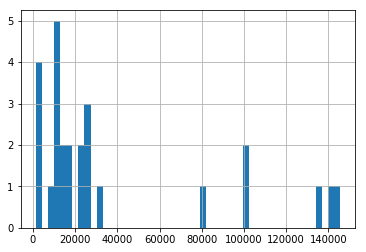

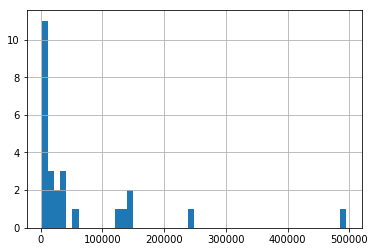

In [304]:
combined.accidents_no.hist(bins=50)
plt.figure()
combined.license_no.hist(bins=50)

## Conclusions and Recommendations

**Findings:**

- The issueing of the licenses and the accident numbers are correlated.
- The mountainous regions has the most accidents/deaths in the country.
- The overall accidents is reduced in 2017 compared to 2016.

**Conclusion**

Improve the infrastructure of the the regions with the most accidents.
Add rail protection on the mountain roads.
Stricter traffic laws might be beneficial on riskier road that has bad infrastructures.